In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.backend import clear_session


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from statistics import mean

clean = np.load('./drive/MyDrive/ECG/clean_final_db.npy')

for i in range(3000):
    clean[i]=clean[i]-np.mean(clean[i])

noisy = np.load('./drive/MyDrive/ECG/noise_final_db.npy')
for i in range(3000):
    noisy[i]=noisy[i]-np.mean(noisy[i])



In [ ]:
noisy
clean

from scipy.signal import resample

fs_original = 3000
fs_target = 360

noisy_downsampled = np.zeros((noisy.shape[0], 3600))

for i in range(noisy.shape[0]):
  noisy_downsampled[i] = resample(noisy[i], int(len(noisy[0]) * fs_target / fs_original))

noisy_downsampled = noisy_downsampled[:, :1024*3].reshape(-1, 1024)

for i in range(noisy_downsampled.shape[0]):
  noisy_downsampled[i] = noisy_downsampled[i]-np.mean(noisy_downsampled[i])

clean_downsampled = np.zeros((noisy.shape[0], 3600))

for i in range(clean.shape[0]):
  clean_downsampled[i] = resample(clean[i], int(len(clean[0]) * fs_target / fs_original))

clean_downsampled = clean_downsampled[:, :1024*3].reshape(-1, 1024)
for i in range(clean_downsampled.shape[0]):
  clean_downsampled[i] = clean_downsampled[i]-np.mean(clean_downsampled[i])

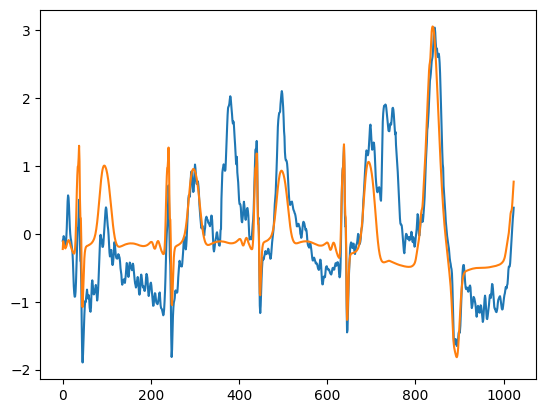

In [ ]:
import matplotlib.pyplot as plt
plt.plot(noisy_downsampled[9])
plt.plot(clean_downsampled[9])

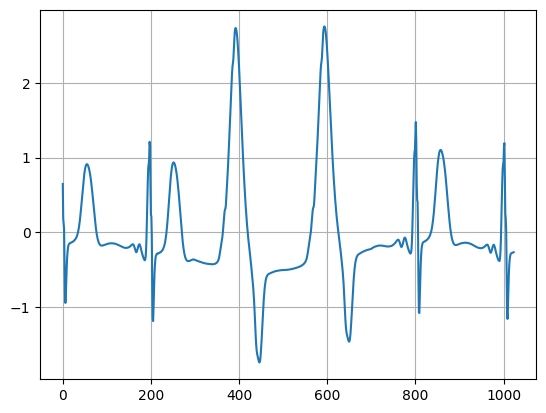

In [ ]:
plt.plot(clean_downsampled[11])
plt.grid()

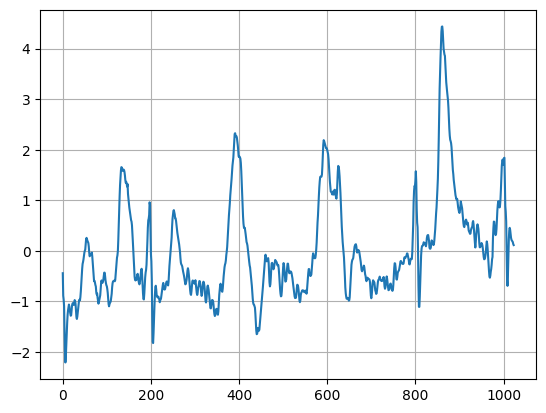

In [ ]:
plt.plot(noisy_downsampled[11])
plt.grid()

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.backend import clear_session
import tensorflow as tf

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, concatenate, Activation, Input, Conv2DTranspose, Lambda, LSTM, Reshape, Embedding
import keras.backend as K


# Clear session
clear_session()

def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, activation='relu', padding='same'):
    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters,
                        kernel_size=(kernel_size, 1),
                        activation=activation,
                        strides=(strides, 1),
                        padding=padding)(x)
    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
    return x

input_shape = (1024, 1)
input = Input(shape=input_shape)

# Encoder
x = Conv1D(filters=40,
            input_shape=(1024, 1),
            kernel_size=16,
            activation='elu',
            strides=2,
            padding='same')(input)

x = BatchNormalization()(x)

x = Conv1D(filters=20,
            kernel_size=16,
            activation='elu',
            strides=2,
            padding='same')(x)

x = BatchNormalization()(x)

x = Conv1D(filters=20,
            kernel_size=16,
            activation='elu',
            strides=2,
            padding='same')(x)

x = BatchNormalization()(x)

x = Conv1D(filters=20,
            kernel_size=16,
            activation='elu',
            strides=2,
            padding='same')(x)

x = BatchNormalization()(x)

x = Conv1D(filters=40,
            kernel_size=16,
            activation='elu',
            strides=2,
            padding='same')(x)

x = BatchNormalization()(x)

x = Conv1D(filters=1,
            kernel_size=16,
            activation='elu',
            strides=1,
            padding='same')(x)

x = BatchNormalization()(x)

# Decoder
x = Conv1DTranspose(input_tensor=x,
                    filters=1,
                    kernel_size=16,
                    activation='elu',
                    strides=1,
                    padding='same')

x = BatchNormalization()(x)

x = Conv1DTranspose(input_tensor=x,
                    filters=40,
                    kernel_size=16,
                    activation='elu',
                    strides=2,
                    padding='same')

x = BatchNormalization()(x)

x = Conv1DTranspose(input_tensor=x,
                    filters=20,
                    kernel_size=16,
                    activation='elu',
                    strides=2,
                    padding='same')

x = BatchNormalization()(x)

x = Conv1DTranspose(input_tensor=x,
                    filters=20,
                    kernel_size=16,
                    activation='elu',
                    strides=2,
                    padding='same')

x = BatchNormalization()(x)

x = Conv1DTranspose(input_tensor=x,
                    filters=20,
                    kernel_size=16,
                    activation='elu',
                    strides=2,
                    padding='same')

x = BatchNormalization()(x)

x = Conv1DTranspose(input_tensor=x,
                    filters=40,
                    kernel_size=16,
                    activation='elu',
                    strides=2,
                    padding='same')

x = BatchNormalization()(x)

predictions = Conv1DTranspose(input_tensor=x,
                    filters=1,
                    kernel_size=16,
                    activation='linear',
                    strides=1,
                    padding='same')

model2 = Model(inputs=[input], outputs=predictions)

model2.compile(optimizer=Adam(learning_rate=0.01, clipnorm=0.4), loss='mean_squared_error', metrics=['mae'])

model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 512, 40)           680       
                                                                 
 batch_normalization (BatchN  (None, 512, 40)          160       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 20)           12820     
                                                                 
 batch_normalization_1 (Batc  (None, 256, 20)          80        
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 128, 20)           6420  

In [ ]:
clean2 = np.load('./drive/MyDrive/ECG/second_db_clean.npy')

for i in range(10000):
    clean2[i]=clean2[i]-np.mean(clean2[i])

noisy2 = np.load('./drive/MyDrive/ECG/second_db_noisy.npy')

for i in range(10000):
    noisy2[i]=noisy2[i]-np.mean(noisy2[i])

In [ ]:
##contaminated_signal = np.concatenate((noisy2, noisy_downsampled), axis = 0)
##clean_signal = np.concatenate((clean2, clean_downsampled), axis = 0)
contaminated_signal = noisy_downsampled
clean_signal = clean_downsampled

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(contaminated_signal.reshape(-1, 1024, 1), clean_signal.reshape(-1, 1024, 1), test_size=0.25, random_state=44)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=44)

In [ ]:
history = model2.fit(X_train, y_train, epochs=150, batch_size=300, validation_data=(X_val, y_val))

Epoch 1/150
23/23 [==============================] - 13s 82ms/step - loss: 0.9179 - mae: 0.5772 - val_loss: 0.5084 - val_mae: 0.4768
Epoch 2/150
23/23 [==============================] - 1s 59ms/step - loss: 0.1655 - mae: 0.2589 - val_loss: 0.6243 - val_mae: 0.5743
Epoch 3/150
23/23 [==============================] - 1s 58ms/step - loss: 0.1293 - mae: 0.2134 - val_loss: 0.2648 - val_mae: 0.4108
Epoch 4/150
23/23 [==============================] - 1s 58ms/step - loss: 0.1046 - mae: 0.1828 - val_loss: 0.1397 - val_mae: 0.2441
Epoch 5/150
23/23 [==============================] - 1s 61ms/step - loss: 0.0973 - mae: 0.1784 - val_loss: 0.1075 - val_mae: 0.2014
Epoch 6/150
23/23 [==============================] - 1s 63ms/step - loss: 0.0865 - mae: 0.1572 - val_loss: 0.1053 - val_mae: 0.1948
Epoch 7/150
23/23 [==============================] - 1s 65ms/step - loss: 0.0892 - mae: 0.1691 - val_loss: 0.0989 - val_mae: 0.1748
Epoch 8/150
23/23 [==============================] - 1s 64ms/step - loss: 0

In [ ]:
y_pred = model2.predict(X_test)

8/8 [==============================] - 1s 24ms/step


In [ ]:
plt.plot(X_test[5],label='noisy')


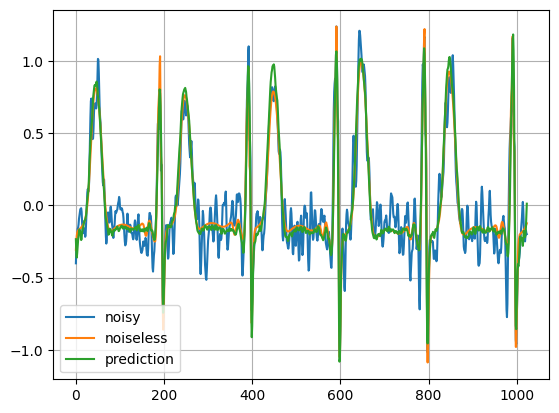

In [ ]:
i=1

plt.plot(X_test[i],label='noisy')
plt.plot(y_test[i], label='noiseless')
plt.plot(y_pred[i], label='prediction')
plt.grid()
plt.legend()

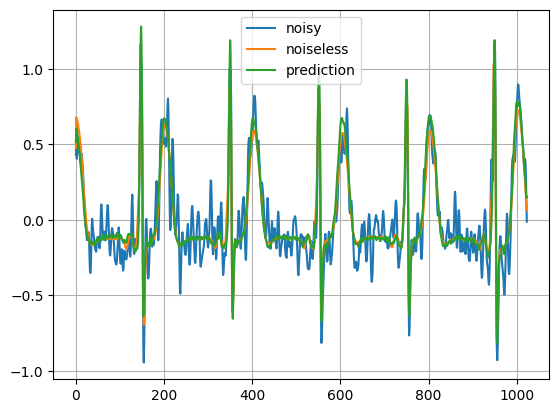

In [ ]:
i=65

plt.plot(X_test[i],label='noisy')
plt.plot(y_test[i], label='noiseless')
plt.plot(y_pred[i], label='prediction')
plt.grid()
plt.legend()

In [ ]:
from scipy.signal import resample

In [ ]:
data = np.genfromtxt('./drive/MyDrive/ECG/test_ecg.csv', delimiter=',')
data2 = resample(data, int(len(data) * 250 / 360))
testdata = data[3000:6600]
testdata1 = testdata[:1024]
testdata1 -= np.mean(testdata1)
testdata2 = testdata[1024: 2*1024]
testdata2 -= np.mean(testdata2)
testdata3 = testdata[2*1024: 3*1024]
testdata3 -= np.mean(testdata3)

In [ ]:
y_pred1 = model2.predict(testdata1.reshape(-1,1024,1))
y_pred2 = model2.predict(testdata2.reshape(-1,1024,1))
y_pred3 = model2.predict(testdata3.reshape(-1,1024,1))


1/1 [==============================] - 0s 20ms/step


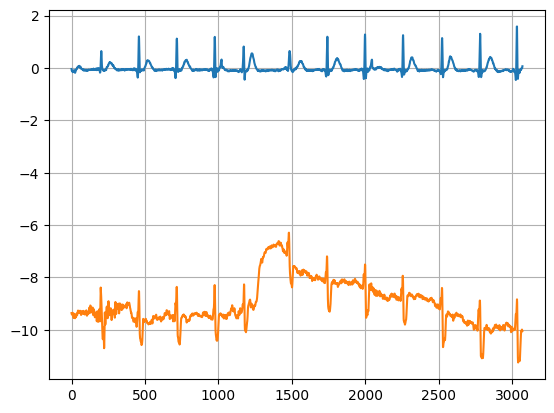

In [ ]:
plt.plot(np.concatenate((y_pred1.flatten(),y_pred2.flatten(),y_pred3.flatten())))
data = np.genfromtxt('./drive/MyDrive/ECG/test_ecg.csv', delimiter=',')
plt.plot(data[3000:3000+3*1024])
plt.grid()

In [ ]:
model2.save('./drive/MyDrive/ECG/modelo_bueno')


In [11]:
import tensorflow as tf
model = tf.keras.models.load_model('./modelo_bueno.h5')

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.